#**Feature Transformation**

Consider a machine learning model whose task is to decide whether a credit card transaction is fraudulent or not. Based on your application background knowledge and data analysis, you might decide which data fields (or features) are important to include in the input data. For example, transaction amount, merchant name, address, and credit card owner's address are important to provide to the learning process. On the other hand, a randomly generated transaction ID carries no information (if we know that it really is random), and is not useful.

Once you have decided on which fields to include, you transform these features to help the learning process. Transformations add background experience to the input data, enabling the machine learning model to benefit from this experience. For example, the following merchant address is represented as a string:

"123 Main Street, Seattle, WA 98101"

By itself, the address has limited expressive power – it is useful only for learning patterns associated with that exact address. Breaking it up into constituent parts, however, can create additional features like "Address" (123 Main Street), "City" (Seattle), "State" (WA) and "Zip" (98101). Now, the learning algorithm can group more disparate transactions together, and discover broader patterns – perhaps some merchant zip codes experience more fraudulent activity than others.



Feature Engineer/transformation is the process of determining which features might be useful in training a model, and then creating those features by transforming raw data found in log files and other sources.

We will talk about the following Feature Transformation techniques:
1. Log Transformation
2. Power Transformation: Box-Cox Transformation
3. Yeo-Johnson Transformation
4. Polynomial Transformation


#**Log Transformation**

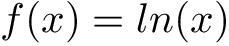

Quite often data arising in real studies are so skewed that standard statistical analyses of these data yield invalid results. Many methods have been developed to test the normality assumption of observed data. When the distribution of the continuous data is non-normal, transformations of data are applied to make the data as "normal" as possible and, thus, increase the validity of the associated statistical analyses. 

The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality.

Log transforms are useful when applied to skewed distributions as they tend to expand the values which fall in the range of lower magnitudes and tend to compress or reduce the values which fall in the range of higher magnitudes. This tends to make the skewed distribution as normal-like as possible. 

We can use it (natural logarithmic ln or log base 10) to make extremely skewed distributions less skewed.

note that this function is defined only for strictly ***positive numbers.***

Let's see an example below:


In [1]:
#import the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

In [2]:
fcc=pd.read_csv('C:/Users/Aabha Gupta/Downloads/workbench-dataset/fcc_2016.csv',encoding='utf-8')

In [3]:
fcc.head()

,ID.x,Age,ChildrenNumber,CountryCitizen,EmploymentField,EmploymentStatus,ExpectedEarning,Gender,Income,JobPref,JobRoleInterest,LanguageAtHome,MaritalStatus,SchoolDegree,StudentDebtOwe
0,cef35615d61b202f1dc794ef2746df14,28.0,NaN,United States of America,office and administrative support,Employed for wages,NaN,male,32000.0,freelance,NaN,English,married or domestic partnership,"some college credit, no degree",20000.0
1,323e5a113644d18185c743c241407754,22.0,NaN,United States of America,food and beverage,Employed for wages,50000.0,male,15000.0,work for a startup,Front-End Web Developer,English,NaN,"some college credit, no degree",NaN
2,b29a1027e5cd062e654a63764157461d,19.0,NaN,United States of America,finance,Employed for wages,NaN,male,48000.0,start your own business,NaN,English,NaN,high school diploma or equivalent (GED),NaN
3,04a11e4bcb573a1261eb0d9948d32637,26.0,NaN,United States of America,"arts, entertainment, sports, or media",Employed for wages,65000.0,female,43000.0,work for a startup,Front-End Web Developer,English,NaN,bachelor's degree,7000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,NaN,United States of America,education,Employed for wages,45000.0,female,6000.0,work for a medium-sized company,Full-Stack Web Developer,Khmer,NaN,"some college credit, no degree",NaN


Let's select some features to work with.

In [4]:
selected_fcc=fcc[['CountryCitizen','Gender','Age','Income']]
selected_fcc

,CountryCitizen,Gender,Age,Income
0,United States of America,male,28.0,32000.0
1,United States of America,male,22.0,15000.0
2,United States of America,male,19.0,48000.0
3,United States of America,female,26.0,43000.0
4,United States of America,female,20.0,6000.0
...,...,...,...,...
15615,Kenya,male,39.0,10000.0
15616,India,male,27.0,10000.0
15617,Nigeria,male,37.0,48000.0
15618,Spain,male,26.0,10000.0


Text(0, 0.5, 'Frequency')

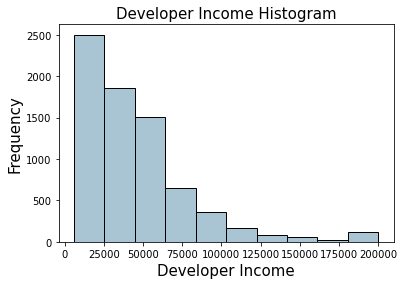

In [5]:
fig, ax = plt.subplots()
selected_fcc['Income'].hist(bins=10, color='#A9C5D3', 
                             edgecolor='black', grid=False)


ax.set_title('Developer Income Histogram', fontsize=15)
ax.set_xlabel('Developer Income', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)

We can see that our income feature is right skewed and does not follow normal distribution.

Some Machine Learning algorithms such as Naive Bayes assume that your data is normally distributed and hence it is a good practice to transform your data to approach normal distribution.

##Log transform the Feature to Normal Distribution

In [6]:
selected_fcc['Income_log'] = np.log((selected_fcc['Income']))
selected_fcc

,CountryCitizen,Gender,Age,Income,Income_log
0,United States of America,male,28.0,32000.0,10.373491
1,United States of America,male,22.0,15000.0,9.615805
2,United States of America,male,19.0,48000.0,10.778956
3,United States of America,female,26.0,43000.0,10.668955
4,United States of America,female,20.0,6000.0,8.699515
...,...,...,...,...,...
15615,Kenya,male,39.0,10000.0,9.210340
15616,India,male,27.0,10000.0,9.210340
15617,Nigeria,male,37.0,48000.0,10.778956
15618,Spain,male,26.0,10000.0,9.210340


The **Income_log** field depicts the transformed feature after log transformation. Let’s look at the data distribution on this transformed field now.


Text(9.8, 1380, '$\\mu$=10.43')

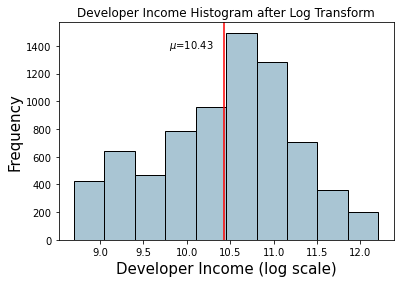

In [7]:

#plot the Income_log
fig, ax = plt.subplots()
selected_fcc['Income_log'].hist(bins=10, color='#A9C5D3', 
                                 edgecolor='black', grid=False)

#let's add the income_log_mean on our plot to see where the mean of the new income distribution is.
income_log_mean = np.round(np.mean(selected_fcc['Income_log']), 2)
plt.axvline(income_log_mean, color='r')

#set title and x,y labels
ax.set_title('Developer Income Histogram after Log Transform', 
             fontsize=12)
ax.set_xlabel('Developer Income (log scale)', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)

#disply the mean on the plot(NB: (9.8, 1380) shows where to indicate the mean on the plot. It can be adjusted to be put anywhere on the plot)

ax.text(9.8, 1380, r'$\mu$='+str(income_log_mean), fontsize=10)

We can now see that our income feature has been transformed to approach normal distribution.

We can also use the [**FunctionTransformer**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html) in the *scikit-learn preprpcessor* to achive the same thing.

#**Power Transformation:** Box-Cox Transformation

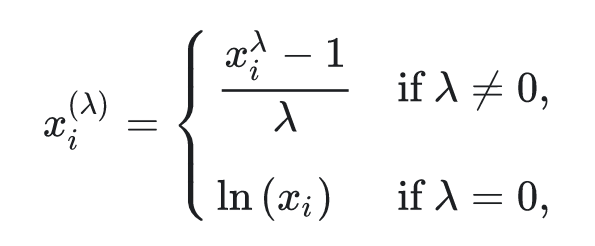

In **Box-Cox transformation**, we search and evaluate all the other transformations and choose the best one.
The exponent is a variable called lambda (λ) that varies over the range of -5 to 5, and in the process of searching, we examine all values of λ and finally choose the optimal value which results in the best approximation to a normal distribution for our variable.

Note that this function is defined only for positive numbers.

The optimal value of λ is usually determined using a maximum likelihood or log-likelihood estimation.

First we get the optimal lambda value from the data distribution by removing the non-null values as follows.

In [8]:
income = np.array(selected_fcc['Income'])
#use the '~'sign to help remove all the null income values
income_clean = income[~np.isnan(income)]
l, opt_lambda = spstats.boxcox(income_clean)
print('Optimal lambda value:', opt_lambda)

Optimal lambda value: 0.11799122497648248


With our optimal λ value, we can now use the Box-Cox transform for two values of λ such that λ = 0 and λ = λ(optimal) and transform the developer Income feature.


In [9]:
selected_fcc['Income_boxcox(lambda=0)'] = spstats.boxcox(
                                  (selected_fcc['Income']), 
                                          lmbda=0)



selected_fcc['Income_boxcox(lambda=opt)'] = spstats.boxcox(
                                            selected_fcc['Income'], 
                                              lmbda=opt_lambda)

In [10]:

selected_fcc.head()

,CountryCitizen,Gender,Age,Income,Income_log,Income_boxcox(lambda=0),Income_boxcox(lambda=opt)
0,United States of America,male,28.0,32000.0,10.373491,10.373491,20.346418
1,United States of America,male,22.0,15000.0,9.615805,9.615805,17.881577
2,United States of America,male,19.0,48000.0,10.778956,10.778956,21.758798
3,United States of America,female,26.0,43000.0,10.668955,10.668955,21.368923
4,United States of America,female,20.0,6000.0,8.699515,8.699515,15.180667


We see the transformed features shown in the above data frame. As expected *Income_log* and *Income_boxcox_lamba_0* have the same values. 

Let’s look at the distribution of the transformed Income feature after transforming with the optimal λ.

Text(21.5, 1380, '$\\mu$=20.65')

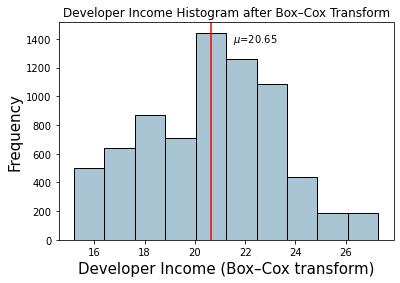

In [11]:

#plot the Income_log
fig, ax = plt.subplots()
selected_fcc['Income_boxcox(lambda=opt)'].hist(bins=10, color='#A9C5D3', 
                                 edgecolor='black', grid=False)

#let's add the income_log_mean on our plot to see where the mean of the new income distribution is.
income_log_mean = np.round(np.mean(selected_fcc['Income_boxcox(lambda=opt)']), 2)
plt.axvline(income_log_mean, color='r')

#set title and x,y labels
ax.set_title('Developer Income Histogram after Box–Cox Transform', 
             fontsize=12)
ax.set_xlabel('Developer Income (Box–Cox transform)', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)

#disply the mean on the plot(NB: (21.5, 1380) shows where to indicate the mean on the plot. It can be adjusted to be put anywhere on the plot)

ax.text(21.5, 1380, r'$\mu$='+str(income_log_mean), fontsize=10)

#**Yeo-Johnson  Transformation**

Return a dataset transformed by a Yeo-Johnson power transformation.

Unlike the Box-Cox transform, it does not require the values for each input variable to be strictly positive. It supports zero values and negative values. This means we can apply it to our dataset without scaling it first.

<br>

**Before Yeo-Johnson Transformation**

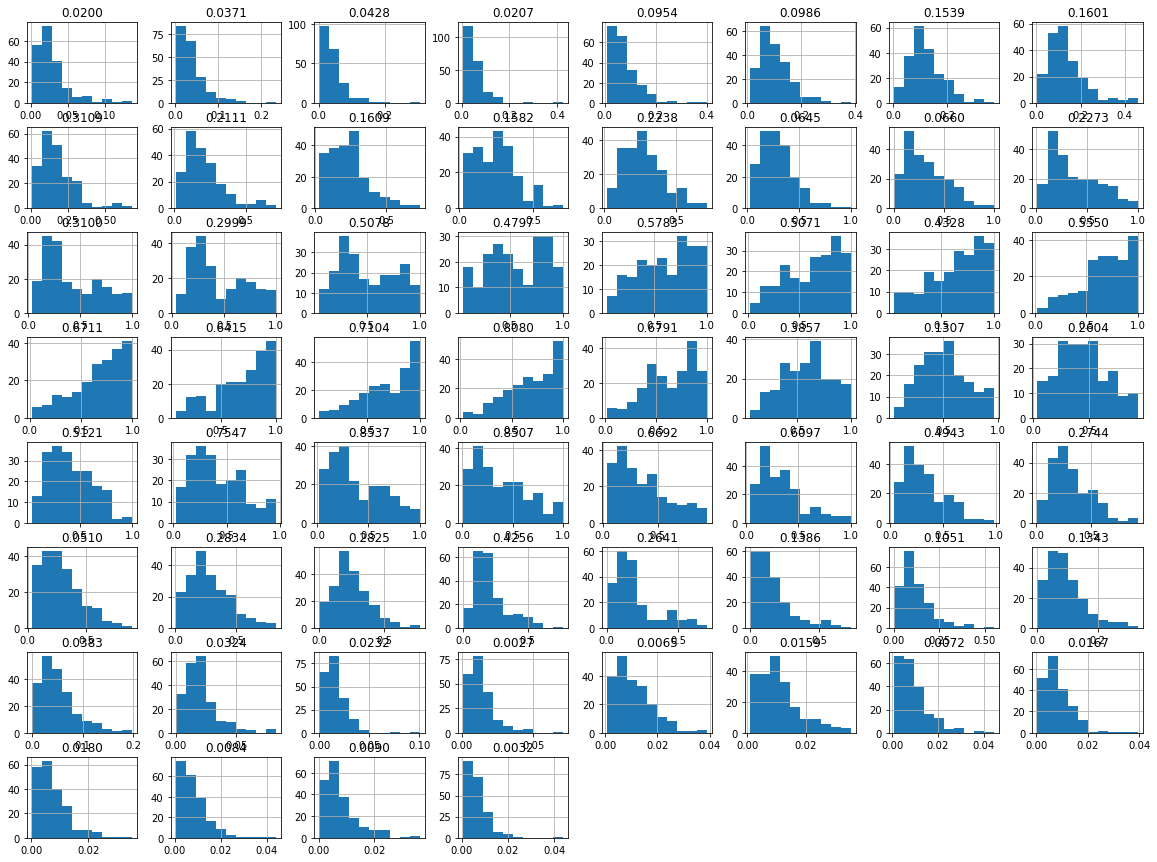

In [12]:
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
# Load dataset
sona=pd.read_csv('C:/Users/Aabha Gupta/Downloads/workbench-dataset/sonar.csv',encoding='utf-8')
# sona = sona.values[:, :-1]
# # convert the array back to a dataframe
# sona = pd.DataFrame(sona)
# # histograms of the variables
sona.hist(figsize=(20,15))
pyplot.show()

<br>

**After Yeo-Johnson Transformation**

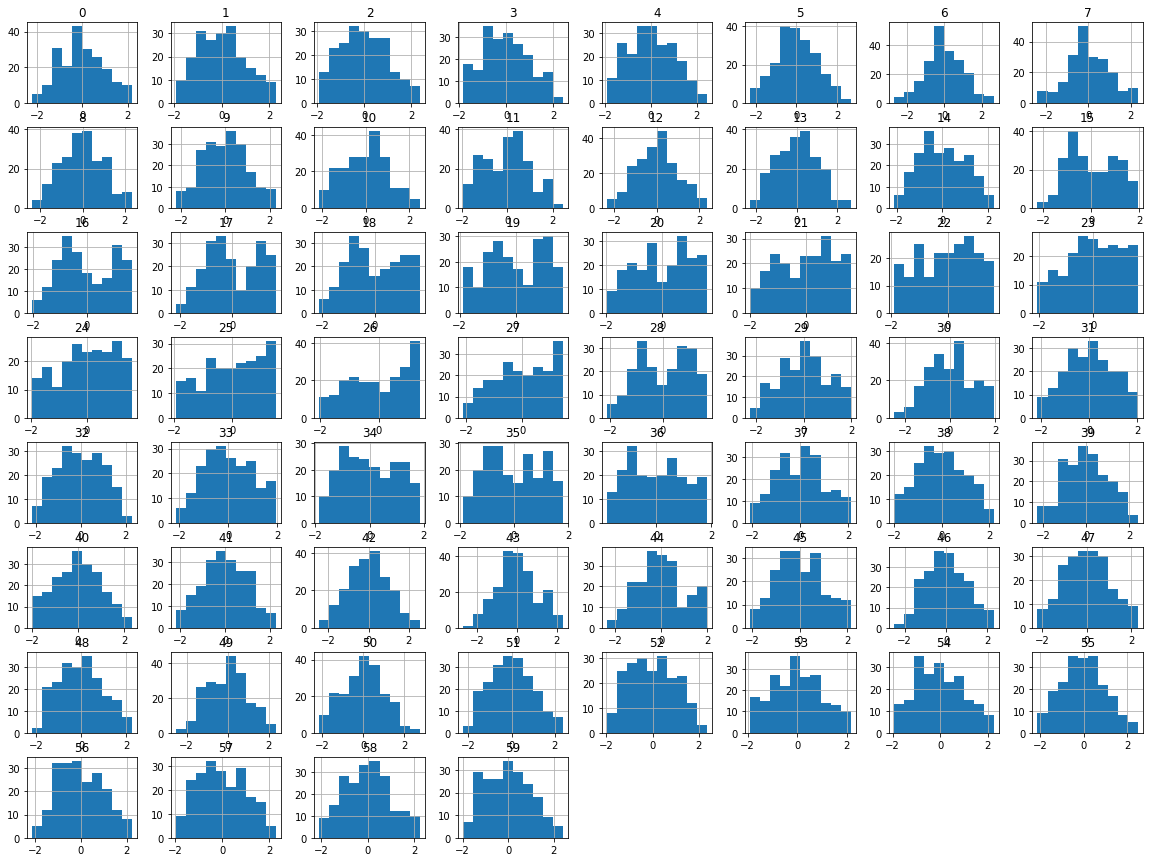

In [13]:
# Load dataset
sona=pd.read_csv('C:/Users/Aabha Gupta/Downloads/workbench-dataset/sonar.csv',encoding='utf-8')
sona = sona.values[:, :-1]
# perform a yeo-johnson transform of the dataset
pt = PowerTransformer(method='yeo-johnson')
sona = pt.fit_transform(sona)
# convert the array back to a dataframe
sona = pd.DataFrame(sona)
# histograms of the variables
sona.hist(figsize=(20,15))
pyplot.show()

#**Polynomial Transformation**: Exercise

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot
# load dataset
sona=pd.read_csv('C:/Users/Aabha Gupta/Downloads/workbench-dataset/sonar.csv',encoding='utf-8')
sona = sona.values[:, :-1]
# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=3)
sona = trans.fit_transform(sona)
# convert the array back to a dataframe
sona = pd.DataFrame(sona)
# histograms of the variables
sona.hist(figsize=(20,15))
pyplot.show()

We will be seeing other feature transformation as we progress in the course.

